<a id='intro'></a>
## Introduction

# This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

# A)‘ScheduledDay’ tells us on what day the patient set up their appointment.
# B)‘Neighborhood’ indicates the location of the hospital.
# C)‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
# D)Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


# We are trying to answer two questions
# A) Which factors that drive the patient to show up for their appointments in order to predict if they are likely to show up or not ?
# B) What is the overall rate show up vs not showing up ?

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [130]:
#Libraries we will be useing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [131]:
#Reading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#Showing the first 4 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [132]:
#General information that can help
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that there is a negative value in Age

In [133]:
#The number of rows and columns
df.shape

(110527, 14)

In [134]:
#checking if there is missing data
#also checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can see, there is no missing data

In [135]:
#Double check if there is null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [136]:
#checking if there are dplicates in data 
#Also made a small if condition to be sure if there are negatives values
sum(df.duplicated())
if any(x <= 0 for x in df["Age"]) == False :
    print ('There are negative value')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [137]:
#fixing the errors in the columns headers
df.rename(columns = {'PatientId' : 'Patient_ID',
                     'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [138]:
#Fix the mistakes in Age Column
df[df['Age'] <= 0] = df['Age'].mean()

In [152]:
#To Make using data easier
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])
showed = df['No_show'] == 0
didnt_show = df['No_show'] == 1
df['showed'] = showed
df['didnt_show'] = didnt_show

<ipython-input-152-568242abd8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'Yes'] = '1'
<ipython-input-152-568242abd8a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.No_show[df['No_show'] == 'No'] = '0'


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Show up vs no show up Rate

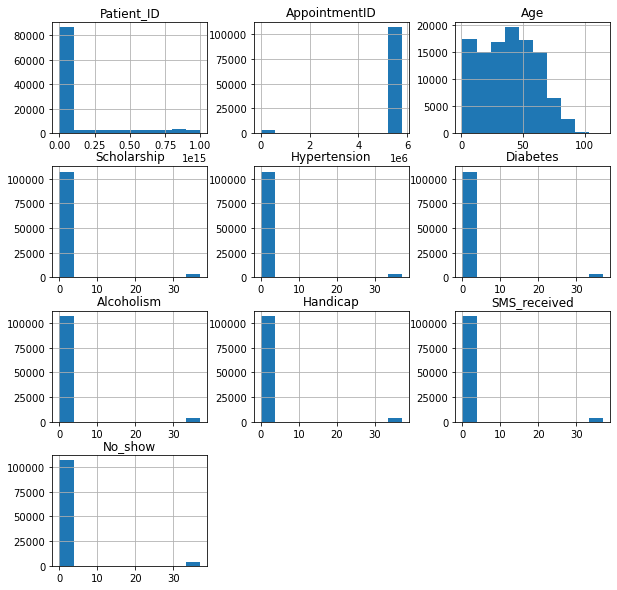

In [153]:
df.hist(figsize = (10,10));

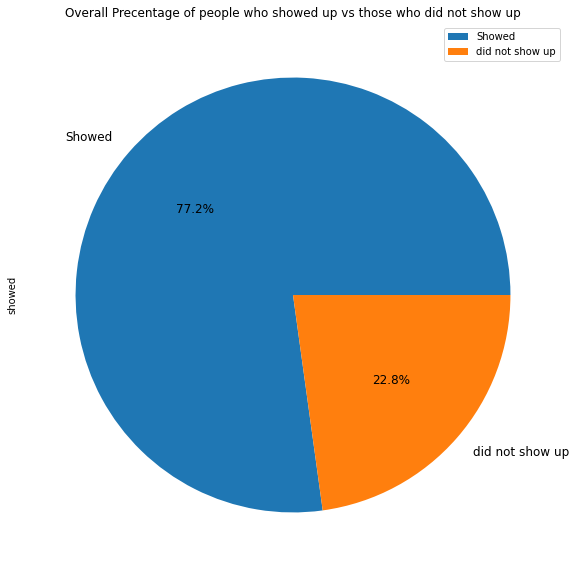

In [154]:
allP = df['showed'].value_counts()
mylabels = ['Showed' , 'did not show up']
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', labels = mylabels  , fontsize = 12);
pieChart.set_title("Overall Precentage of people who showed up vs those who did not show up");
plt.legend();

As we can see, the precentage of people who showed up for their appointments is 77.2% while the people who did not show up is 22.8%

In [170]:
df[showed].count()


Patient_ID        85307
AppointmentID     85307
Gender            85307
ScheduledDay      85307
AppointmentDay    85307
Age               85307
Neighbourhood     85307
Scholarship       85307
Hypertension      85307
Diabetes          85307
Alcoholism        85307
Handicap          85307
SMS_received      85307
No_show           85307
showed            85307
didnt_show        85307
dtype: int64

In [171]:
df[didnt_show].count()

Patient_ID        21680
AppointmentID     21680
Gender            21680
ScheduledDay      21680
AppointmentDay    21680
Age               21680
Neighbourhood     21680
Scholarship       21680
Hypertension      21680
Diabetes          21680
Alcoholism        21680
Handicap          21680
SMS_received      21680
No_show           21680
showed            21680
didnt_show        21680
dtype: int64

We can conculde from above that the numbers of people who show for their appointments is at least 3 times more than people who did not

### What is the feature that is most important which drive the patient to show up for their appointment

In [205]:
def display_histplot(variable, xlabel, ylabel, title):
    """Instead of repeating the same lines, we are using this function
    """
    plt.figure(figsize=(10, 10))
    variable[showed].hist(label = 'showed')
    variable[didnt_show].hist(label = 'didnt_show')
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

    

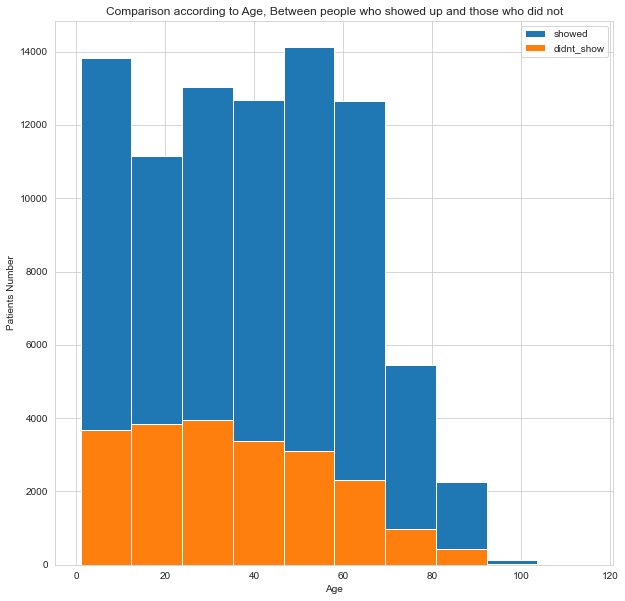

In [206]:
display_histplot(df.Age,'Age','Patients Number',
                 'Comparison according to Age, Between people who showed up and those who did not')

In [180]:
#Comparing the numbers of people who showed up vs those who did not according to Age
print(df.Age[showed].value_counts())
print(df.Age[didnt_show].value_counts())

1.0      1858
52.0     1449
56.0     1372
2.0      1366
59.0     1357
         ... 
98.0        5
100.0       4
102.0       2
115.0       2
99.0        1
Name: Age, Length: 102, dtype: int64
1.0      415
17.0     396
19.0     394
30.0     369
9.0      364
        ... 
94.0       6
115.0      3
97.0       2
98.0       1
96.0       1
Name: Age, Length: 99, dtype: int64


The older people get, the less they tend to get an appoitment

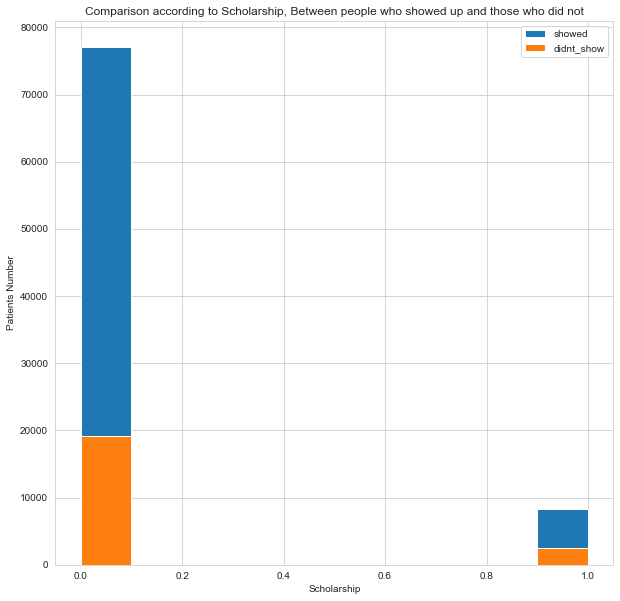

In [207]:
display_histplot(df.Scholarship,'Scholarship','Patients Number',
                 'Comparison according to Scholarship, Between people who showed up and those who did not')

In [173]:
#Comparing the numbers of people who showed up vs those who did not according to Scholarship
print(df.Scholarship[showed].value_counts())
print(df.Scholarship[didnt_show].value_counts())

0.0    77069
1.0     8238
Name: Scholarship, dtype: int64
0.0    19109
1.0     2571
Name: Scholarship, dtype: int64


Scholarship wasn't significant 

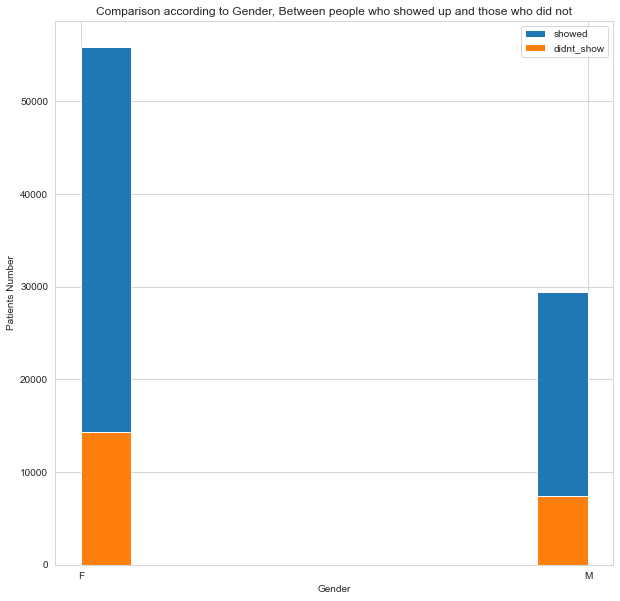

In [208]:
display_histplot(df.Gender,'Gender','Patients Number',
                 'Comparison according to Gender, Between people who showed up and those who did not')

In [172]:
#Comparing the numbers of people who showed up vs those who did not according to gendeer
print(df.Gender[showed].value_counts())
print(df.Gender[didnt_show].value_counts())

F    55843
M    29464
Name: Gender, dtype: int64
F    14275
M     7405
Name: Gender, dtype: int64


Gender wasn't significant as females were more than the males in both cases

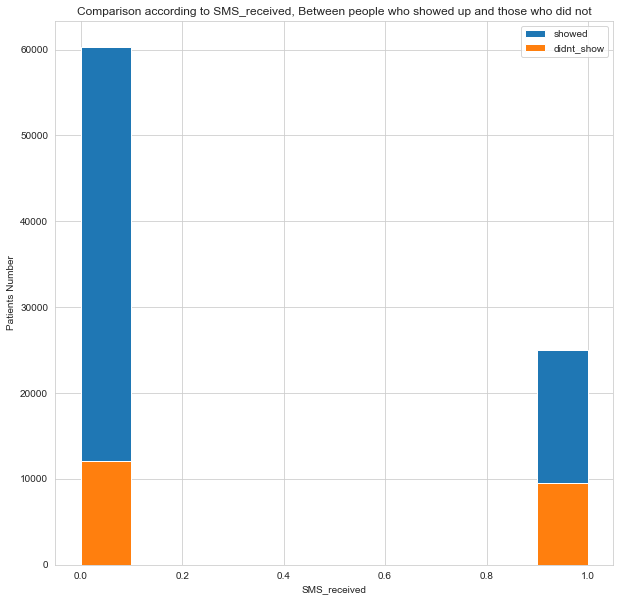

In [209]:
display_histplot(df.SMS_received,'SMS_received','Patients Number',
                 'Comparison according to SMS_received, Between people who showed up and those who did not')

In [176]:
#Comparing the numbers of people who showed up vs those who did not according to SMS_received
print(df.SMS_received[showed].value_counts())
print(df.SMS_received[didnt_show].value_counts())

0.0    60290
1.0    25017
Name: SMS_received, dtype: int64
0.0    12112
1.0     9568
Name: SMS_received, dtype: int64


many people showed up without SMS_received 

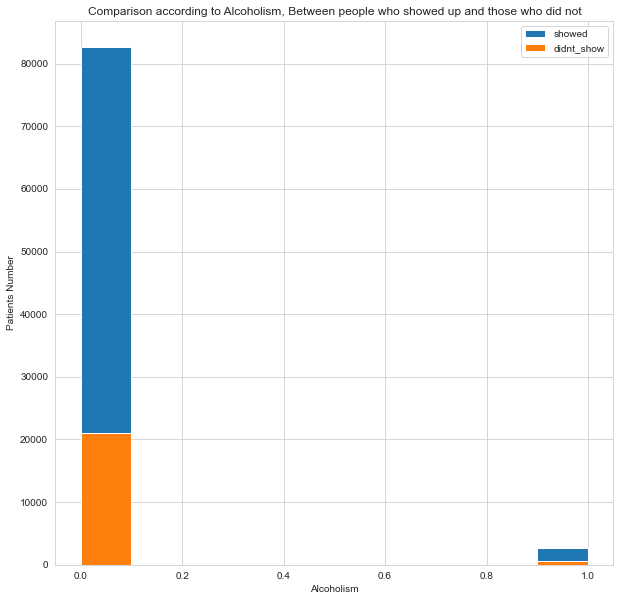

In [210]:
display_histplot(df.Alcoholism,'Alcoholism','Patients Number',
                 'Comparison according to Alcoholism, Between people who showed up and those who did not')

In [174]:
#Comparing the numbers of people who showed up vs those who did not according to Alcoholism
print(df.Alcoholism[showed].value_counts())
print(df.Alcoholism[didnt_show].value_counts())

0.0    82624
1.0     2683
Name: Alcoholism, dtype: int64
0.0    21003
1.0      677
Name: Alcoholism, dtype: int64


Alcoholism wasn't significant

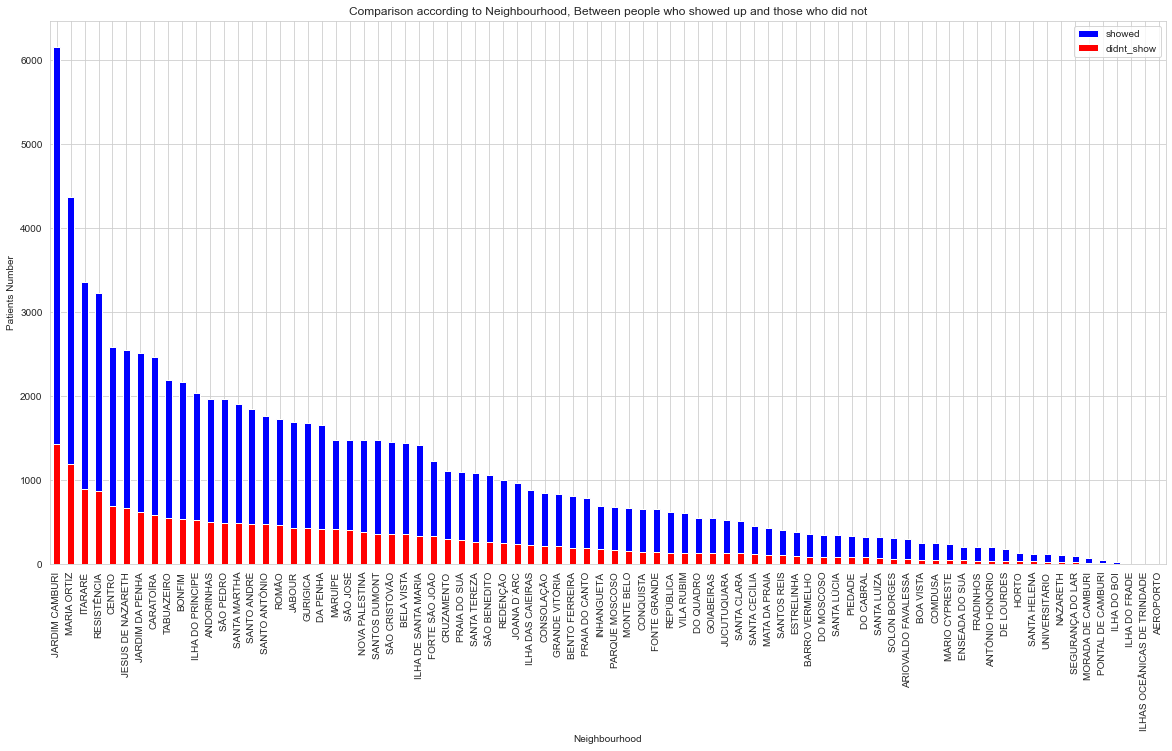

In [194]:
plt.figure(figsize=(20, 10))
df.Neighbourhood[showed].value_counts().plot(kind = 'bar', color = 'blue',label = 'showed')
df.Neighbourhood[didnt_show].value_counts().plot(kind = 'bar', color = 'red',label = 'didnt_show')
sns.set_style('whitegrid')
plt.legend()
plt.title('Comparison according to Neighbourhood, Between people who showed up and those who did not')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

In [175]:
#Comparing the numbers of people who showed up vs those who did not according to Neighbourhood
print(df.Neighbourhood[showed].value_counts())
print(df.Neighbourhood[didnt_show].value_counts())

JARDIM CAMBURI       6154
MARIA ORTIZ          4369
RESISTÊNCIA          3360
JARDIM DA PENHA      3224
CENTRO               2590
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64
JARDIM CAMBURI                 1432
MARIA ORTIZ                    1194
ITARARÉ                         898
RESISTÊNCIA                     875
CENTRO                          692
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64


Neighbourhood is significant and it affects the rate of people showing up

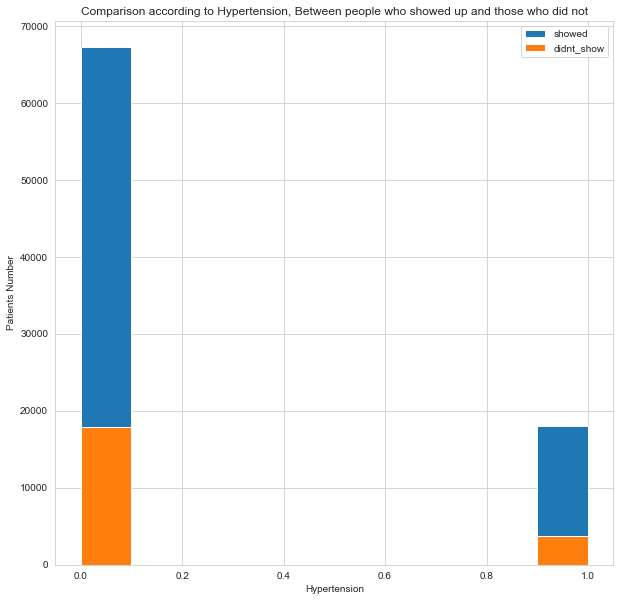

In [211]:
display_histplot(df.Hypertension,'Hypertension','Patients Number',
                 'Comparison according to Hypertension, Between people who showed up and those who did not')

In [177]:
#Comparing the numbers of people who showed up vs those who did not according to Hypertension
print(df.Hypertension[showed].value_counts())
print(df.Hypertension[didnt_show].value_counts())

0.0    67278
1.0    18029
Name: Hypertension, dtype: int64
0.0    17908
1.0     3772
Name: Hypertension, dtype: int64


Hypertension wasn't significant

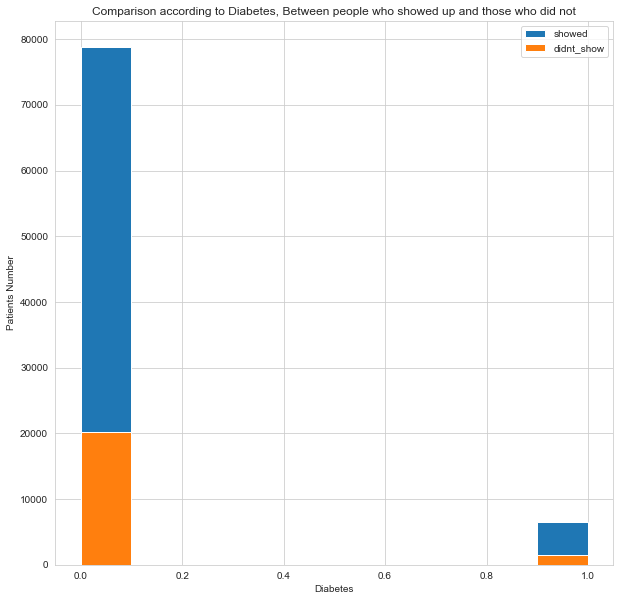

In [212]:
display_histplot(df.Diabetes,'Diabetes','Patients Number',
                 'Comparison according to Diabetes, Between people who showed up and those who did not')

In [179]:
#Comparing the numbers of people who showed up vs those who did not according to Diabetes
print(df.Diabetes[showed].value_counts())
print(df.Diabetes[didnt_show].value_counts())

0.0    78794
1.0     6513
Name: Diabetes, dtype: int64
0.0    20250
1.0     1430
Name: Diabetes, dtype: int64


Diabetes wasn't significant

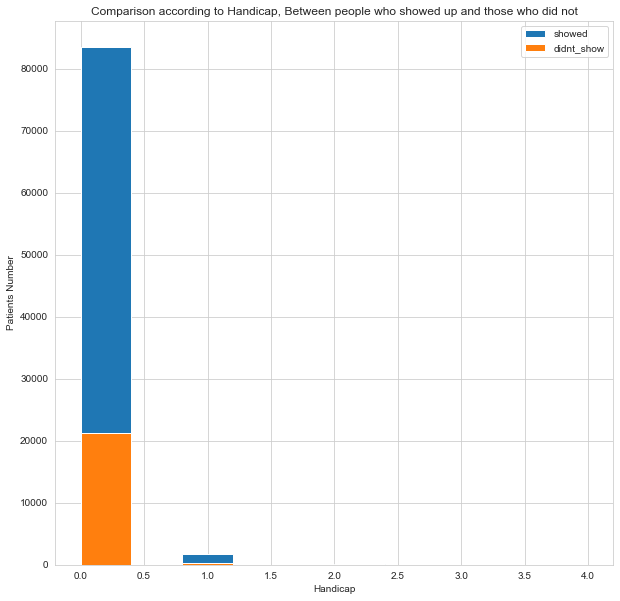

In [213]:
display_histplot(df.Handicap,'Handicap','Patients Number',
                 'Comparison according to Handicap, Between people who showed up and those who did not')

In [178]:
#Comparing the numbers of people who showed up vs those who did not according to Handicap
print(df.Handicap[showed].value_counts())
print(df.Handicap[didnt_show].value_counts())

0.0    83474
1.0     1675
2.0      146
3.0       10
4.0        2
Name: Handicap, dtype: int64
0.0    21273
1.0      366
2.0       37
3.0        3
4.0        1
Name: Handicap, dtype: int64


Handicap wasn't significant

<a id='conclusions'></a>
## Limitations:
## There were negative values in age 
## There could be more features to make the data better and more reliable 
## Conculsions:
## A) Age is the most important factor that drives a patient to show up for an appointment 
## B) We can see that 22.8 % of people doesn't show up for their appointments
## C) Neighbourhood is related to patients showing up for the appointments
## D) There are features that doesn't drive the patient to show up such as alcoholic 
## E) People who has a Scholarship are most likely not to show up to their appointments
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [113]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1